In [64]:
import pandas as pd
import json
import os.path as osp
import matplotlib.pyplot as plt
from PIL import Image

In [104]:
path = "../../receptive-fields/imgs/model_rfs/areadne_submission/stride_large_ks3"
with open(osp.join(path, "autolabels.json")) as f:
    classified_rfs = json.load(f)

In [105]:
rf_types = ["center_surround","color", "gabor", "mult_freq", "noise", "simple_edge", "unclassifiable"]

In [106]:
df = pd.DataFrame(
    columns=[
        "layer",
        "type",
        "rf_number",
        *rf_types
    ]
)

In [107]:
for key in classified_rfs.keys():
    layer, rf_type, rf_id= key.split(".")[0].split("_")
    layer = int(layer)
    rf_id = int(rf_id)
    df = pd.concat([df, pd.DataFrame([[layer, rf_type, rf_id, *classified_rfs[key]]], columns = df.columns)])

/tmp/ipykernel_17409/2110842130.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[layer, rf_type, rf_id, *classified_rfs[key]]], columns = df.columns)])


In [108]:
rel_indices = pd.notna(df.center_surround) & df.type.isin(["Conv2d"])

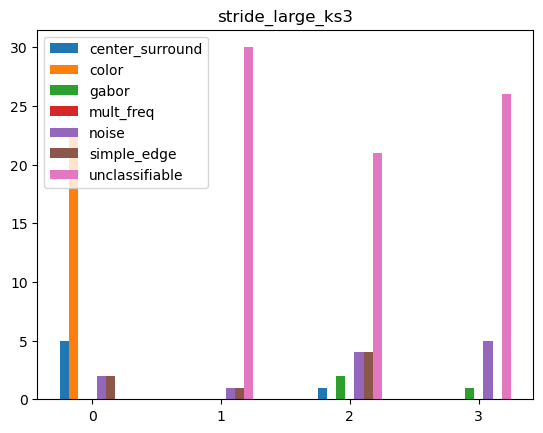

In [109]:
df_ = df[rel_indices]
width = 1/(len(rf_types)*2)
for i, rf_type in enumerate(rf_types):
    df_type=df_[df_.values[:,-len(rf_types):].argmax(axis=1)==i]
    plt.bar(
        [layer+(i-3)*width for layer in range(4)],
        [len(df_type[df_type.layer==layer]) for layer in range(4)],
        width=width
    )
plt.xticks([0,1,2,3])
plt.legend(rf_types)
plt.title(osp.split(path)[1])
plt.show()

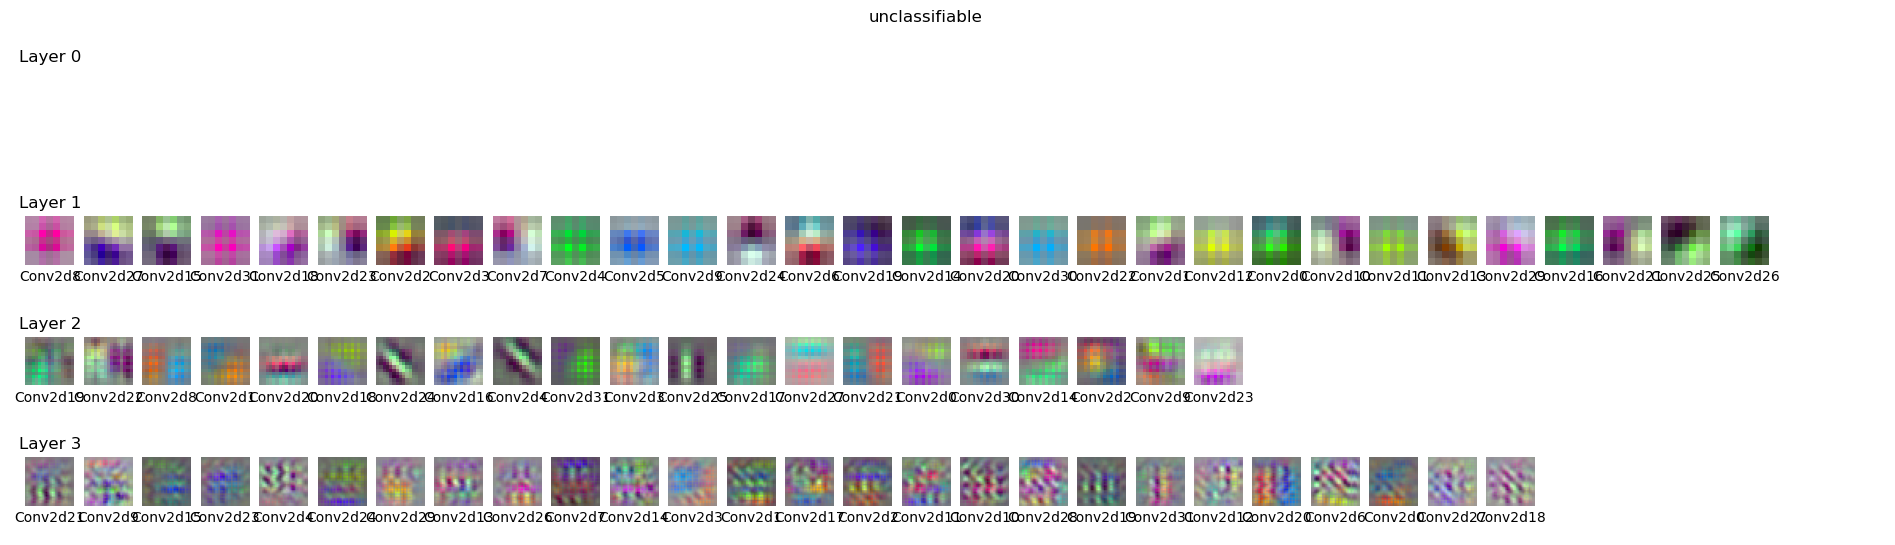

In [114]:
# plot layer
rf_type_id = 6
fig, axes = plt.subplots(4, 32, figsize=(24,6))
for ax in axes.flat:
    ax.axis('off')
for layer in range(4):
    axes[layer,0].set_title("Layer "+str(layer))
    df_type = df_[df_.values[:,-len(rf_types):].argmax(axis=1)==rf_type_id]
    rfs = df_type[df_type.layer == layer]
    for i in range(len(rfs.values)):
        if i < axes.shape[1]:
            rf_type, type_id = rfs[["type", "rf_number"]].values[i]
            im = Image.open(osp.join(path,"{}_{}_{:02d}.png".format(layer, rf_type, type_id)))
            imshow = axes[layer, i].imshow(im)
            axes[layer, i].legend([],title=rf_type + str(type_id), fontsize=8,loc='upper center', bbox_to_anchor=(0.5, 0.1),frameon=False)
plt.xticks([0,1,2,3])
fig.suptitle(rf_types[rf_type_id])
plt.show()